<a href="https://colab.research.google.com/github/Asia-NRI/Introduction-to-ML/blob/main/Introduction_to_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random

In [2]:
#Introduction to ML
#Used Libraries-random,numpy,pandas

In [3]:
#Terms in Machine Learning
# 1.Collection : Data used for training,validating and testing the Machine Learning
# 2.Feature(X) : Independent variable or input variable-used to predict the target variable
# 3.Target(Y) : Dependent variable-Output-we want to predict-
#Example:predicting Number of bedrooms
# 4.Training Data : Subset of dataset used to train the model
# 5.Testing Data : Subset of dataset used to validate the trained model
# 6.Model : Mathematical representation of relationship between feature and target
# 7.Supervised Leaning(SL) : Training the model based on labeled data || model learns from known/labeled data
# 8.Regression : Method to predict continuous values frm a method-supervised learning
# 9.Overfitting : when a model learns from training data too well,includes noise-Perform poorly new data
#10.Underfitting : Model is too simpled and does not capture patterns in data

## Categories in Machine learning:
# 1. Supervised Learning:
#  Model learns from labeled data - i/o pairs
#  Example: Linear regression,Decision trees, Random forest,SVM
#  Best use case so far : House price prediction based on previous/historical data

# 2. Unsupervised learning:
#   Model finds new patterns in unlabelled data without predefined data/labels
#   Example: Clustering (K means),PCA
#   Use case : Customer segmentation in marketing

# 3 . Reinforcement learning :
#   Model learns by interacting with environment and receiving the rewards or penalties
#   Example : Deep learning,AlphaGo,..
#   Best use case : self car driving vehicles,self learning AI boys,SLAM



In [4]:
# Example : Predicting the House price-Random dataset-generated

#steps:
#1.Generate a random dataset
#2.Train a ML model-Linear regression
#3.Evaluate the Model
#4.Make prediction

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
# Step 1 :Generate a random dataset
np.random.seed(42) # Used to set same sequence of values for the random package
numSamples = 100
#create numSamples number of samples from(800,5000)
size = np.random.randint(800,5000,numSamples)

bedrooms = np.random.randint(1,6,numSamples)
Washrooms =  np.random.randint(1,8,numSamples)
localityScore = np.random.randint(1,10,numSamples)
#Generate House prices with some randomness
housePrice = (size*3000)+(bedrooms*50000)+(Washrooms*30000)+(localityScore*70000)+np.random.randint(-50000,50000,numSamples)

#Create a dataframe
df=pd.DataFrame(
    {
        'Size':size,
        'Bedrooms':bedrooms,
        'Washrooms':Washrooms,
        'Locality Score':localityScore,
        'Price':housePrice
    }
)



In [7]:
df

,Size,Bedrooms,Washrooms,Locality Score,Price
0,1660,5,2,9,5964758
1,4572,4,7,5,14517747
2,3892,5,7,8,12708752
3,1266,5,6,1,4304573
4,4244,3,2,5,13301101
...,...,...,...,...,...
95,1006,1,6,5,3591286
96,2284,3,5,1,7240450
97,1663,4,6,4,5620352
98,3590,1,3,5,11265069


In [8]:
#Step 2 : Train a ML model-Linear regression

#Package(installation)requirements :
#pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [9]:
X = df[['Size','Bedrooms','Washrooms','Locality Score']]
Y = df['Price']

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [11]:
# Step 3 : Evaluate the Model
# Package Requirements :
# sklearn.metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred = model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

print('Mean Absolute Error: {MAE}')
print('Mean squared Error: {MSE}')
print('Root Mean squared Error: {RMSE}')



Mean Absolute Error: {MAE}
Mean squared Error: {MSE}
Root Mean squared Error: {RMSE}


In [12]:
#step 4:Make prediction
newHouse=np.array([[4000,4,6,10]])
PredictedPrice=model.predict(newHouse)
print(f'The PredictedPrice of newHouse is {PredictedPrice[0]}')





The PredictedPrice of newHouse is 13069094.887436867


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [13]:
print(f'The PredictedPrice of newHouse is {PredictedPrice[0]}')

The PredictedPrice of newHouse is 13069094.887436867


<ipython-input-14-3324137cbba7>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


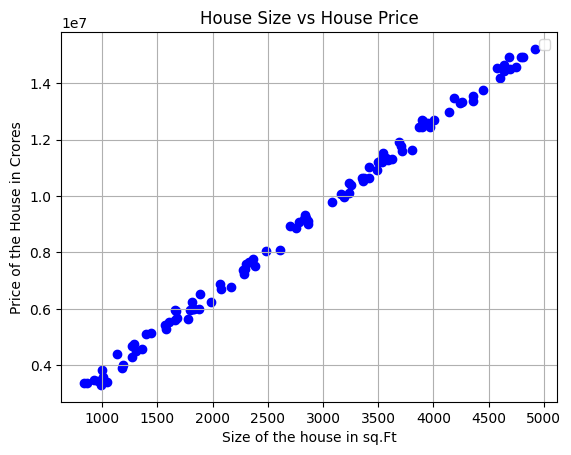

In [14]:
plt.scatter(df['Size'],df['Price'], color = 'blue')
#plt.plot(df['Size'],np.reshape(y_pred), color = 'red',linewidth = 2)
plt.xlabel('Size of the house in sq.Ft')
plt.ylabel('Price of the House in Crores')
plt.legend()
plt.grid(True)
plt.title('House Size vs House Price')
plt.show()


In [15]:
XSorted = np.sort(X,axis=0)
yPred = model.predict(XSorted)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<ipython-input-16-0ffc1611e253>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


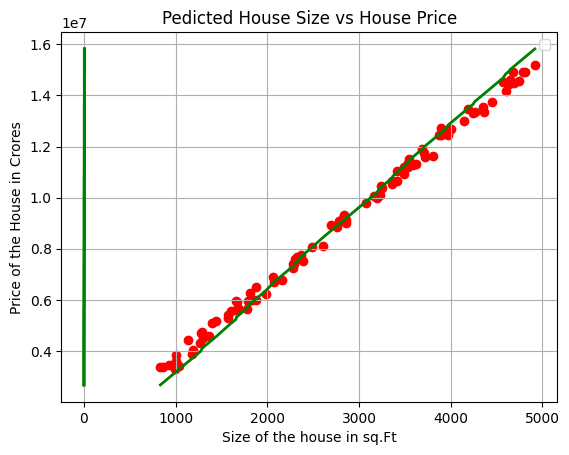

In [16]:
plt.scatter(df['Size'],df['Price'], color = 'red')
plt.plot(XSorted,yPred, color = 'green',linewidth = 2)
plt.xlabel('Size of the house in sq.Ft')
plt.ylabel('Price of the House in Crores')
plt.legend()
plt.grid(True)
plt.title('Pedicted House Size vs House Price')
plt.show()